## Innomatics Internship APR 21
### Music Recommender System
 AUTHOR : MOHIT KUMAR

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import norm

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 1000

In [2]:
main_df = pd.read_csv("Datasets/Innomatics/MSR/kaggle_visible_evaluation_triplets.txt",sep='\t',names=["user_id","song_id","freq"])
main_df.head()

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [3]:
main_df.tail()

,user_id,song_id,freq
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2
1450932,5e650759ebf89012044c6d52121eeada8b0ec814,SOTCMDJ12A6D4F8528,3


In [4]:
main_df.shape

(1450933, 3)

In [5]:
main_df.dtypes

user_id    object
song_id    object
freq        int64
dtype: object

In [6]:
main_df.describe()

,freq
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [7]:
main_df.isnull().sum()

user_id    0
song_id    0
freq       0
dtype: int64

In [8]:
print(sum(main_df.duplicated()))

0


In [9]:
detail_df = pd.read_csv("Datasets/Innomatics/MSR/unique_tracks.txt",sep='<SEP>',names=["track_id","song_id","artist_name","release"])
detail_df.head()

,track_id,song_id,artist_name,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [10]:
detail_df.tail()

,track_id,song_id,artist_name,release
999995,TRYYYUS12903CD2DF0,SOTXAME12AB018F136,Kiko Navarro,O Samba Da Vida
999996,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999997,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999998,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday
999999,TRYYYVU12903CD01E3,SOWXJXQ12AB0189F43,Texta,Fernweh feat. Sektion Kuchikäschtli


In [11]:
detail_df.shape

(1000000, 4)

In [12]:
detail_df.dtypes

track_id       object
song_id        object
artist_name    object
release        object
dtype: object

In [13]:
detail_df.isnull().sum()

track_id        0
song_id         0
artist_name     0
release        15
dtype: int64

In [14]:
print(sum(detail_df.duplicated()))

0


In [15]:
songs_df = pd.merge(main_df,detail_df.drop_duplicates(["song_id"]),on='song_id',how="left")
songs_df.head()

,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


- Identification of variables and data types

In [16]:
songs_df.dtypes

user_id        object
song_id        object
freq            int64
track_id       object
artist_name    object
release        object
dtype: object

In [17]:
songs_df.columns

Index(['user_id', 'song_id', 'freq', 'track_id', 'artist_name', 'release'], dtype='object')

- Analyzing the basic metrics

In [18]:
songs_df.shape

(1450933, 6)

In [19]:
#Basic Stats
print("Mean of freq. : ",np.mean(songs_df["freq"]))
print("Mode of freq. : ",stats.mode(songs_df["freq"]))
print("Median of freq. : ",np.median(songs_df["freq"]))

Mean of freq. :  3.1871492343202616
Mode of freq. :  ModeResult(mode=array([1], dtype=int64), count=array([839136]))
Median of freq. :  1.0


In [20]:
#unique values
print("Total users : ",songs_df["user_id"].unique().size)
print("Total songs : ",songs_df["song_id"].unique().size)
print("Total tracks : ",songs_df["track_id"].unique().size)
print("Unique Releases : ",songs_df["release"].unique().size)
print("Unique Artists : " ,detail_df["artist_name"].unique().size)

Total users :  110000
Total songs :  163206
Total tracks :  163206
Unique Releases :  137623
Unique Artists :  72665


In [21]:
songs_df.isnull().sum()

user_id        0
song_id        0
freq           0
track_id       0
artist_name    0
release        1
dtype: int64

In [22]:
songs_df.drop_duplicates()

,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero
...,...,...,...,...,...,...
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1,TRPLXFD128F1454961,Mos Def,Ms. Fat Booty
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2,TRRBUQL12903CCE501,Sam Cooke,Ain't Misbehavin
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2,TRHNKAU128F9300856,Southside Spinners,Luvstruck
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2,TRDULYN128F4248762,J. Karjalainen & Mustat Lasit,Sinisten tähtien alla


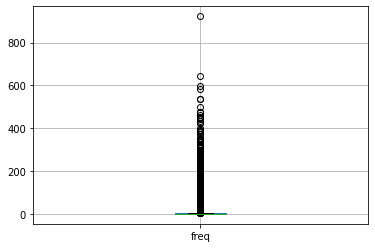

In [23]:
songs_df.boxplot()

-  Non-Graphical Univariate Analysis

In [24]:
songs_df.describe()

,freq
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


- Graphical Univariate Analysis

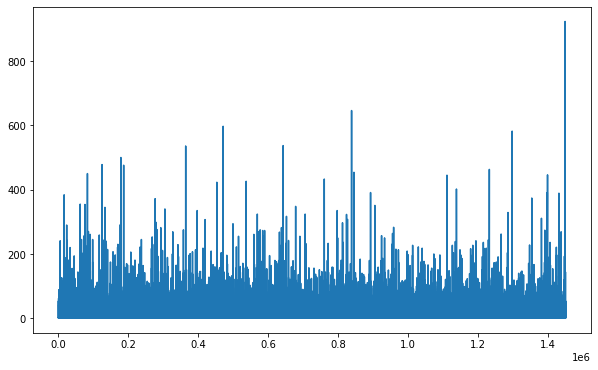

In [25]:
plt.figure(figsize=(10,6))
plt.plot(songs_df["freq"])
plt.show()

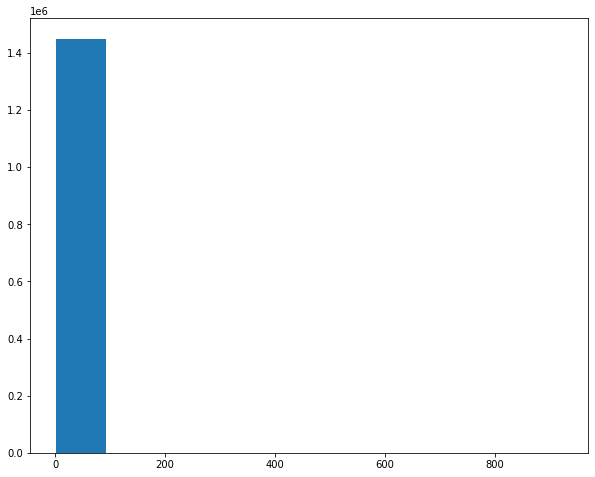

In [26]:
plt.figure(figsize=(10,8))
plt.hist(songs_df["freq"])
plt.show()

- Bivariate Analysis

In [27]:
songs_df.corr()

,freq
freq,1.0


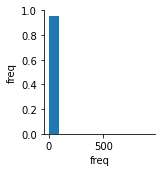

In [28]:
sns.pairplot(songs_df)

In [29]:
songs_tab = pd.crosstab(index=songs_df["song_id"],columns="count")
songs_tab.head()

col_0,count
song_id,
SOAAAFI12A6D4F9C66,2
SOAAAGK12AB0189572,1
SOAAAGQ12A8C1420C8,33
SOAAAMT12AB018C9C4,1
SOAAAQN12AB01856D3,2


In [30]:
print(max(songs_tab["count"]))
print(songs_tab.query("count==5043"))

5043
col_0               count
song_id                  
SOFRQTD12A81C233C0   5043


In [35]:
#sort data in ascending acc. to freq.
songs_df.sort_values(by='freq',inplace=True,ascending=True)
songs_df.head()

,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
674025,0fd4652a0528d66d06b0a59a0962431fccc730b4,SOGCRXY12A8C1439FC,1,TRXYRWA128F92CDF2E,Lil Wayne / Bobby Valentino / Kidd Kidd,Mrs. Officer
674027,0fd4652a0528d66d06b0a59a0962431fccc730b4,SOEPWYH12AF72A4813,1,TRVEXJA12903CADD6F,Kid Cudi,Cudi Zone
674028,0fd4652a0528d66d06b0a59a0962431fccc730b4,SOVQKPV12A6D4F812A,1,TRFDAKD128F145F66F,Dilated Peoples,Guaranteed
674029,0fd4652a0528d66d06b0a59a0962431fccc730b4,SOTEBOX12AAF3B53FE,1,TRLUOYM128F9305C8D,Rammstein,FRüHLING IN PARIS


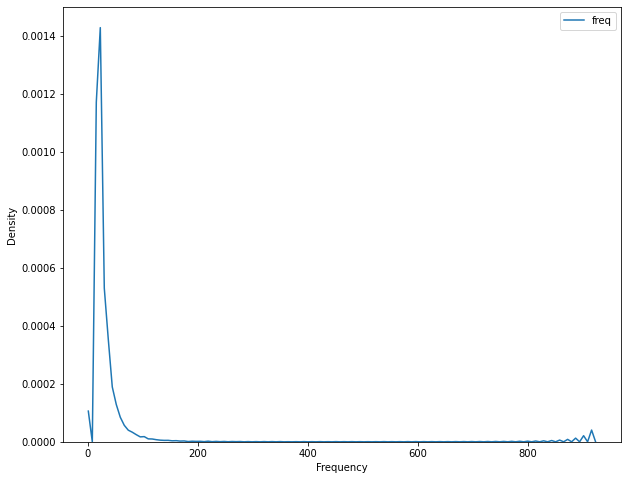

In [32]:
#kde-plot
plt.figure(figsize=(10,8))
sns.kdeplot(songs_df["freq"])
plt.xlabel("Frequency")
plt.ylabel("Density")
plt.show()

In [33]:
grouped_songs=songs_df.groupby(by="user_id").sum()
grouped_songs.head()

,freq
user_id,
00007a02388c208ea7176479f6ae06f8224355b3,13
00014a76ed063e1a749171a253bca9d9a0ff1782,24
00015189668691680bb1a2e58afde1541ec92ced,101
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2,12
00020fcd8b01986a6a85b896ccde6c49f35142ad,44
